Целью этой работы было решение задачи, которая может быть поставлена перед компьютерным лингвистом: задачи кластеризации новостей. В результате мы получили опыт предобработки текста и работы с разными алгоритмами кластеризации текстов, получили возможность сравнить их и посмотреть, какой алгоритм наиболее эффективен.

В нашей работе мы опирались в основном на лабораторную работу, разобранную на первом занятии. Кроме того, для получения иерархической и спектральной классификаций была использована документация sklearn:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering  
http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py  
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering  

Для нашей работы в основном нам понадобилась библиотека sklearn, однако для лемматизации текстов использовался pymystem3:  
http://pypi.python.org/pypi/pymystem3/0.1.1  

Кроме того, были использованы:  
http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure для построения матриц ошибок;  
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html  
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html для удаления дубликатов.  
и  
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html для объяснения сингулярного разложения ниже.

In [9]:
import pandas as pd
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import *
from sklearn.pipeline import *
from sklearn.preprocessing import Normalizer
from sklearn.metrics import *
from sklearn.cluster import *
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

Для начала нам необходимо прочитать файл и избавиться от новостей-дубликатов. Для этого мы использовали метод .drop_duplicates() библиотеки pandas.

In [62]:
df1 = pd.read_csv('clear4.csv')
texts = df1[['in_out','text']].copy()    

Для нормализации текста нам необходима библиотека Mystem.

In [37]:
from pymystem3 import Mystem
m = Mystem()

Здесь мы нормализуем тексты: приводим к нижнему регистру, находим только символьные токены и лемматизируем с помощью метода .lemmatize() библиотеки Mystem.

In [38]:
import re
def normalize(i):
    i = i.lower()
    string1 = re.findall('\w+', i)
    lemmas = m.lemmatize(' '.join(string1))
    return ''.join(lemmas)

In [39]:
from tqdm import tqdm

На этом этапе мы записали очищенные тексты в новый файл и затем снова пропустили их через удаление дубликатов, чтобы они пропали наверняка.

In [40]:
l = list(range(6612))

In [63]:
with tqdm(total=len(l)) as pbar:
    for i in texts.text:
        pbar.update(1)
        try:
            texts.text = texts.text.replace(i, normalize(i))
        except AttributeError:
            texts.text = texts.text.replace(i, 'n')
        
#Ещё разок избавляемся от дубликатов для верности
#texts = texts.drop_duplicates('text') 
#texts.to_csv('norm_raw_texts.csv', encoding='utf-8')

100%|████████████████████████████████████████████████████████████████████████████| 6612/6612 [3:28:11<00:00,  1.80s/it]


In [73]:
texts.to_csv(r'norm_raw_texts2.csv')

In [65]:
texts

,in_out,text
0,in,учитель для россия для я возможность получать ...
1,in,я хотеть становиться участник программа потому...
2,in,начинать с то что еще в школа я смотреть на св...
3,in,я родиться в красноярск но школьный год проход...
4,in,на предыдущий место работа мой карьера складыв...
5,in,уверенный не один я оказываться в ситуация ког...
6,in,как у многий ребенок быть профессия детство дл...
7,in,я хотеть бы становиться участник программа учи...
8,in,когда сам быть школьница на вопрос кто хотеть ...
9,in,осознанный решение быть поступать на психологи...


Начинаем работу с алгоритмами и сначала мы работаем с алгоритмом k-средних. Обучаем на всех текстах, кроме первых ста, чтобы у нас оставались тексты для тестирования. Кроме того, для чистоты перемешиваем данные.

In [68]:
#dataset = pd.read_csv('norm_raw_texts.csv')
dataset = texts[texts.in_out.isin(['in', 'out'])]
dataset['in_out'] = dataset['in_out'].factorize()[0]
dataset = shuffle(dataset)
labels = dataset.in_out[100:].as_matrix()
true_k = np.unique(labels).shape[0]

C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
dataset.to_csv(r'norm_raw_texts3.csv', encoding='utf8')

In [77]:
dataset

,in_out,text
2947,0,я считать что основной задача любой гражданин ...
2566,1,об это всегда с детство грезиться встречать да...
2589,1,желание быть там где звенеть звонок и детский ...
3,0,я родиться в красноярск но школьный год проход...
5163,1,хотеть быть полезный в россия\n
323,0,ммм очень хороший вопрос чтобы отвечать на он ...
1960,1,на мой взгляд именно в школа у человек должный...
4335,0,я верить что нет плохой ребенок быть неправиль...
5380,1,потому что нужно готовить молодой человек спос...
1260,1,россия большой страна мой страна в каждый горо...


SVD: У нас есть большая разреженная матрица, для дальнейшей её обработки мы при помощи svd просто понижаем размерность данных и смотрим на процент приближения. Процент — это сумма дисперсий (коэффициентов на диагонали матрицы в разложении) после того как мы оставили только первые n_components относительно суммы дисперсий в правильном разложении (относительно идеального варианта). Чем больше процент — тем точнее первая матрица приближает вторую.

In [69]:
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=0.7, min_df=0.3, ngram_range=(1,3), analyzer='char')),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=200)),
    ('norm', Normalizer() ),
    ('clust', KMeans(n_clusters=2))
])
#x = v.fit_transform(df['Review'].values.astype('U'))  ## Even astype(str) would work
#добавлено чтобы избежать ошибок с nan
pipeline.fit_transform(dataset.text[100:].astype(str))
dataset.text.fillna(' ')
dataset.in_out.fillna(' ')
#Кто-нибудь, опишите, что показывает этот параметр и почему он такой, а не другой
#Описывать это нужно для каждого применяемого алгоритма
explained_variance = pipeline.named_steps['svd'].explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Explained variance of the SVD step: 89%


In [70]:
clust_labels = pipeline.named_steps['clust'].labels_
labels = dataset.in_out[100:].as_matrix()

print("Homogeneity:", homogeneity_score(labels, clust_labels))
print("Completeness:", completeness_score(labels, clust_labels))
print("V-measure",  v_measure_score(labels, clust_labels))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

Homogeneity: 0.13960979904855098
Completeness: 0.14978873822212732
V-measure 0.14452025805070293
Adjusted Rand-Index: 0.14736652458995775


Ниже будут представлены данные при значениях max_df = 0.5, min_df = 0.1 на символьных н-граммах. Кроме этого, мы проводили тесты с различными значениями, и все они показали себя несколько хуже, чем эти значения. Например, при соответствующих значениях max/min_df 0.7 и 0.3 качество в среднем падает на 3-4% (до ~88%). При max/min_df соответственно 0.5 и 0.3 качество падает на 1-2% (до ~92%). При кластеризации по словарным н-граммам качество при тех же показателях также падает на 3-4% (возможно, из-за увеличивающейся размерности). В целом колебание качества при именениях max/min_df редко превышает 10%.
Также качество довольно резко падает при переходе с триграмм на биграммы (~10% падения), однако при этом повышается объяснённая дисперсия (до 96%).

In [71]:
#на первых текстах (можно взять больше) посмотрим, как кластеризуются данные
cluster = pipeline.predict(dataset.text[:100])
output = dataset.text[:100]
#Я капитан Шепард и это самый отстойный цикл на Цитадели
#При помощи него мы понимаем, куда какой текст кластеризовался.
#Отвечая на вопрос в третьем задании о том, можно ли при помощи кластеров опознать тему документа, 
#можно опираться на вот эти вот восхитительные результаты
for i in range(len(cluster)):
    print("Кластер {}:".format(cluster[i]), output.values[i][:200])

C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Кластер 0: я считать что основной задача любой гражданин передавать получать знание и опыт следующий поколение это необходимый условие без который невозможно себя представлять прогрессивный развитие государство 
Кластер 1: об это всегда с детство грезиться встречать данный предложение и быть свободный сейчас решать а почему не дерзать хотеться сделать нечто во благо общество человек помогать себя проверять

Кластер 1: желание быть там где звенеть звонок и детский смех когда сто вопрос одновременно и потом лучик понимание и благодарность в глаз

Кластер 0: я родиться в красноярск но школьный год проходить в сельский местность когда в 5 м класс у мы начинаться английский я влюбляться в он с первый урок к сожаление для я наш учитель в середина год уходить
Кластер 1: хотеть быть полезный в россия

Кластер 0: ммм очень хороший вопрос чтобы отвечать на он необходимо вернуться в самый детство когда я быть маленький в возраст 7 8 год весь мальчик из мой круг как правило мечтать становиться кос


Кластер 0: хотеться верить что один из главный задача этот проект сделать российский образование соответствовать запрос человек 21 век для я это очень важно считать что накоплять я человеческий и профессиональны
Кластер 1: я работать уже в 4 школа один школа это школа 1 в п чапаево в казахстан и три школа российский я хотеть сказать следующий что задача современный учитель состоять в то чтобы ребенок научаться учиться

Кластер 1: нравиться работа с ребенок а именно в школа получать масса положительный эмоция от общение с ребенок

Кластер 1: я хотеть становиться участник программа учитель для россия из за интерес какой возможность по завершение учеба давать данный программа также интересно пообщаться с другой педагог по свой специальность
Кластер 0: я заинтересовывать возможность становиться часть замечательный проект и вносить свой вклад в образование и воспитание ребенок также очевидный и приятный заинтересованность в кадр поддержка в вид повыш
Кластер 1: готовый педагог от бог в обу

Мы визуализируем матрицу ошибок с помощью библиотеки %ИМЯБИБЛИОТЕКИ%. На осях расположены номера кластеров от 0 до 27 (от 1 до 28). В местах с кординатами (x,y) отмечено количество текстов кластера x, перепутанных с текстами кластера y.
Похоже, что наш алгоритм работает достаточно хорошо, т.к. чем более светлая ячейка, тем больше ошибок.
Например, мы можем видеть, что события кластера 18 (по вертикали) были распределены почти в каждый из других кластеров, но при этом это было сделано с небольшим количеством текстов.

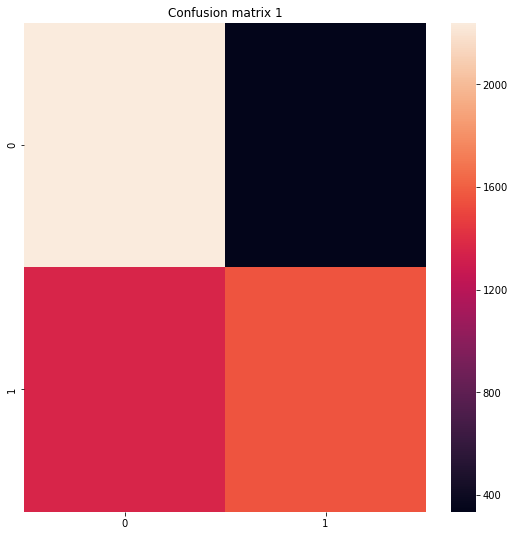

In [72]:
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix(labels, clust_labels))
plt.title("Confusion matrix 1")
plt.show()

In [83]:
dataset

,in_out,text
2947,0,я считать что основной задача любой гражданин ...
2566,1,об это всегда с детство грезиться встречать да...
2589,1,желание быть там где звенеть звонок и детский ...
3,0,я родиться в красноярск но школьный год проход...
5163,1,хотеть быть полезный в россия\n
323,0,ммм очень хороший вопрос чтобы отвечать на он ...
1960,1,на мой взгляд именно в школа у человек должный...
4335,0,я верить что нет плохой ребенок быть неправиль...
5380,1,потому что нужно готовить молодой человек спос...
1260,1,россия большой страна мой страна в каждый горо...


На данном этапе мы модифицируем наш конвейер и используем алгоритм спектральной кластеризации. Результат примерно совпадает с результатом для k-means; результат для слов несколько хуже, чем для символьных н-граммов (результат в ячейке ниже). Показатели для слов при тех же df:  
Homogeneity: 0.85933986947  
Completeness: 0.830456881204  
V-measure: 0.844651532925  
Adjusted Rand-Index: 0.715592942238  

In [84]:
pipeline2 = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, min_df=0.1, ngram_range=(1,3), analyzer='char')),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=200)),
    ('norm', Normalizer() ),
    ('clust', SpectralClustering(n_clusters=true_k, eigen_solver=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1))
])
pipeline2.fit(dataset.text[100:])
labels = dataset.in_out[100:].as_matrix()

explained_variance = pipeline2.named_steps['svd'].explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\scipy\sparse\csgraph\_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


Explained variance of the SVD step: 69%


In [85]:
clust_labels = pipeline2.named_steps['clust'].labels_
print("Homogeneity:", homogeneity_score(labels, clust_labels))
print("Completeness:", completeness_score(labels, clust_labels))
print("V-measure:",  v_measure_score(labels, clust_labels))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

Homogeneity: 0.14290850235522654
Completeness: 0.14400031746133257
V-measure: 0.1434523324883057
Adjusted Rand-Index: 0.19425919317320853


Представим матрицу ошибок для наших кластеров. Из неё видно, что матрица работает практически безошибочно.

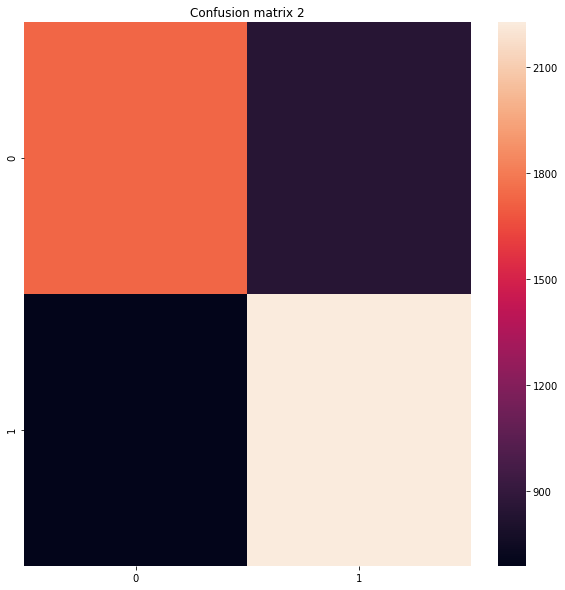

In [86]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(labels, clust_labels))
plt.title("Confusion matrix 2")
plt.show()

Модифицируем наш конвейер ещё раз, чтобы попробовать иерархическую кластеризацию. 

In [97]:
pipeline3 = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, min_df=0.1, ngram_range=(1,3), analyzer='char')),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=200)),
    ('norm', Normalizer() ),
    ('clust', AgglomerativeClustering(n_clusters=true_k, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', pooling_func=np.mean))
])
pipeline3.fit(dataset.text[100:])

clust_labels = pipeline3.named_steps['clust'].labels_
labels = dataset.in_out[100:].as_matrix()

explained_variance = pipeline3.named_steps['svd'].explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Explained variance of the SVD step: 69%


В итоге иерархическая даёт наибольший результат в нашей работе. В выдаче ниже видно результаты для символьных н-граммов; результаты для слов на тех же показателях df:  
Homogeneity: 0.918367536954  
Completeness: 0.886302496614  
V-measure 0.902050153958  
Adjusted Rand-Index: 0.818080995473

In [98]:
print("Homogeneity:", homogeneity_score(labels, clust_labels))
print("Completeness:", completeness_score(labels, clust_labels))
print("V-measure",  v_measure_score(labels, clust_labels))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

Homogeneity: 0.06494165960394173
Completeness: 0.08225329657521334
V-measure 0.07257946503259366
Adjusted Rand-Index: 0.07927808618909855


Из последней матрицы ошибок видно, что иерархическая кластеризация ошибается реже спектральной, хотя тоже иногда путает категории.

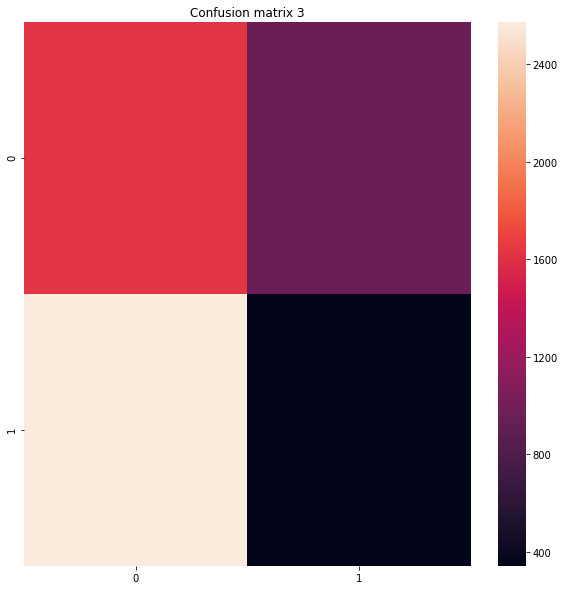

In [99]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(labels, clust_labels))
plt.title("Confusion matrix 3")
plt.show()

Теперь посмотрим, как работает алгоритм k-средних с пятью кластерами.

In [91]:
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, min_df=0.1, ngram_range=(1,3), analyzer='char')),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=200)),
    ('norm', Normalizer() ),
    ('clust', KMeans(n_clusters=5))
])

pipeline.fit(dataset.text[100:])


explained_variance = pipeline.named_steps['svd'].explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Explained variance of the SVD step: 69%


In [92]:
clust_labels = pipeline.named_steps['clust'].labels_
labels = dataset.in_out[100:].as_matrix()

print("Homogeneity:", homogeneity_score(labels, clust_labels))
print("Completeness:", completeness_score(labels, clust_labels))
print("V-measure",  v_measure_score(labels, clust_labels))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

Homogeneity: 0.13887657945116907
Completeness: 0.06606844370526026
V-measure 0.08953971489656862
Adjusted Rand-Index: 0.10608778837179586


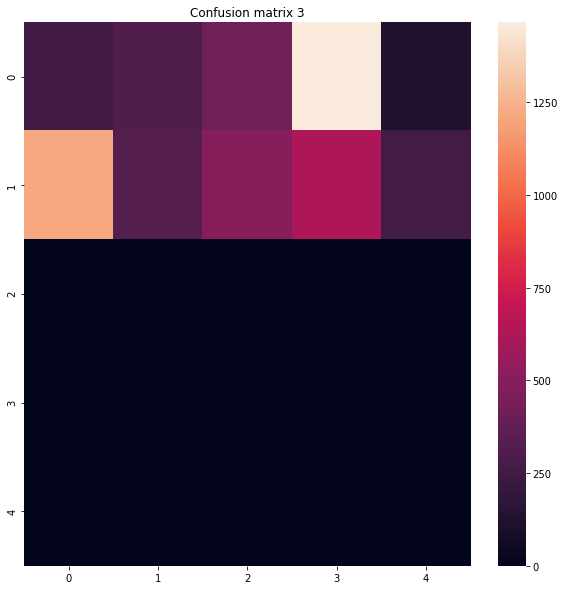

In [93]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(labels, clust_labels))
plt.title("Confusion matrix 3")
plt.show()

При сокращении количества кластеров при обучении качество кластеризации резко падает, так что можно сделать вывод, что такого количества данных недостаточно для качественной кластеризации.